In [1]:
# import packages
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Version of Python:", sys.version)
print("Version of NumPy:", np.__version__)
print("Version of Matplotlib:", matplotlib.__version__)

Version of Python: 3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
Version of NumPy: 1.19.2
Version of Matplotlib: 3.3.2


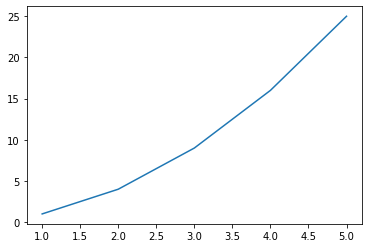

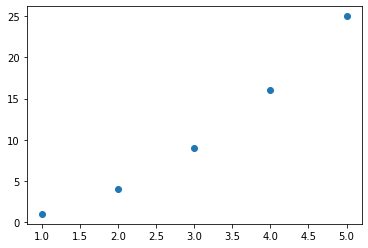

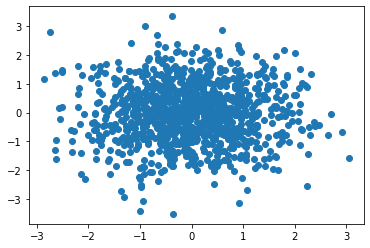

In [2]:
# example: matplotlib.pyplot
plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()

plt.scatter([1,2,3,4,5], [1,4,9,16,25])
plt.show()

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

Keys of diabetes:
 dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
Shape of data: (442, 10)
Shape of target: (442,)

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


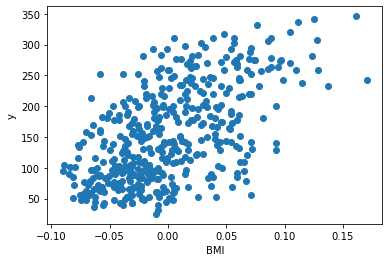

In [4]:
# diabetes
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print("Keys of diabetes:\n", diabetes.keys())
print("Shape of data:", diabetes.data.shape)
print("Shape of target:", diabetes.target.shape)

print("\nFeature Names:", diabetes.feature_names)

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('BMI')
plt.ylabel('y')
plt.show

x = diabetes.data[:, 2]
y = diabetes.target

y_hat = 1.0616962065186886
y[0] = 151.0

@@@@@ using rate @@@@@
y_hat_inc =  1.0678658271705574
w_rate =  0.061696206518688734
w_new =  1.0616962065186888
y_hat_inc =  1.1616962065186887
b_rate =  1.0
b_new =  2.0

@@@@@ using backpropagation @@@@@
w_new =  10.250624555904514 
b_new =  150.9383037934813
First update completed

w_new =  14.132317616381767 
b_new =  75.52764127612664
Second update completed

...

inital (w, b): 1.0 1.0
learned (w, b):  587.8654539985689 99.40935564531424


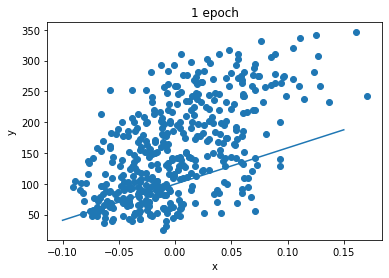

100 epoch (w, b):  913.5973364345905 123.39414383177204


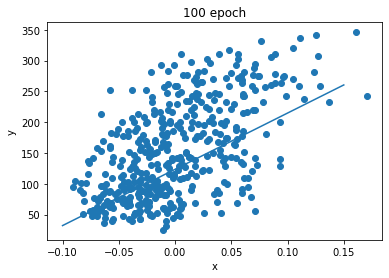

y_pred =  287.8416643899983


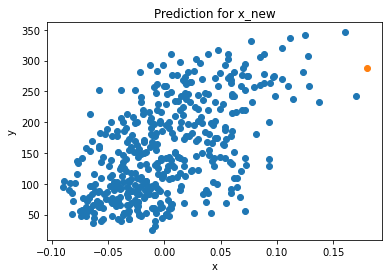

In [60]:
## gradient descent

# initialize w, b
w = 1.0
b = 1.0

y_hat = x[0] * w + b
print("y_hat =", y_hat)
print("y[0] =", y[0])

## using rate
print("\n@@@@@ using rate @@@@@")
# update weight w
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print("y_hat_inc = ", y_hat_inc)

w_rate = (y_hat_inc - y_hat)/(w_inc - w)
print("w_rate = ", w_rate) # w_rate = x[0]

w_new = w + w_rate
print("w_new = ", w_new)

# update bias b
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print("y_hat_inc = ", y_hat_inc)

b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print("b_rate = ", b_rate)

b_new = b + 1
print("b_new = ", b_new)

## using backpropagation
print("\n@@@@@ using backpropagation @@@@@")
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print("w_new = ", w_new, "\nb_new = ", b_new)
print("First update completed\n")

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + err
print("w_new = ", w_new, "\nb_new = ", b_new)
print("Second update completed\n")

# iterate for all samples
print("...\n")
print("inital (w, b):", w, b)
for x_i, y_i in zip(x, y): # zip(x, y) method는 배열 x, y에서 각각 한 요소씩 꺼내주는 역할
    y_hat = x_i * w +b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + err
print("learned (w, b): ", w, b)

# plot
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]]) # plot([x array], [y array])
plt.xlabel('x')
plt.ylabel('y')
plt.title('1 epoch')
plt.show()

# 100 epoch (100 iterations for all samples)
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + err
print("100 epoch (w, b): ", w, b)

# plot
plt.figure()
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]]) # plot([x array], [y array])
plt.xlabel('x')
plt.ylabel('y')
plt.title('100 epoch')
plt.show()

# predict new data
x_new = 0.18
y_pred = x_new * w + b
print("y_pred = ", y_pred)

# plot
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction for x_new')
plt.show()